<a href="https://colab.research.google.com/github/RaoUmair98/BirdsCLEF-Voice/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%ls

HistoricalData_1616235263243.csv  RNN.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("RNN.csv")
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/19/2021,$119.99,185549500,$119.9,$121.43,$119.675
1,03/18/2021,$120.53,121469800,$122.88,$123.18,$120.32
2,03/17/2021,$124.76,111932600,$124.05,$125.8599,$122.336
3,03/16/2021,$125.57,115227900,$125.7,$127.22,$124.715
4,03/15/2021,$123.99,92590560,$121.41,$124,$120.42


In [ ]:
df_1 = df.Volume.values.reshape(-1,1)
df_1

array([[185549500],
       [121469800],
       [111932600],
       ...,
       [372313051],
       [325741230],
       [412712555]])

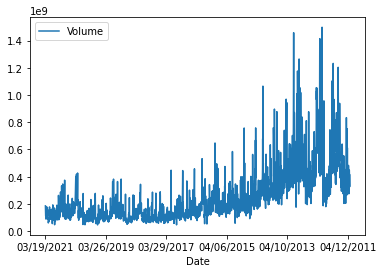

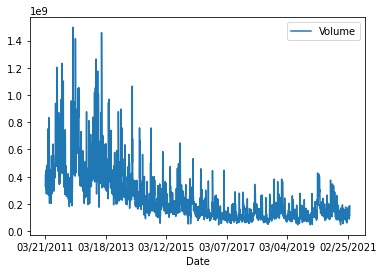

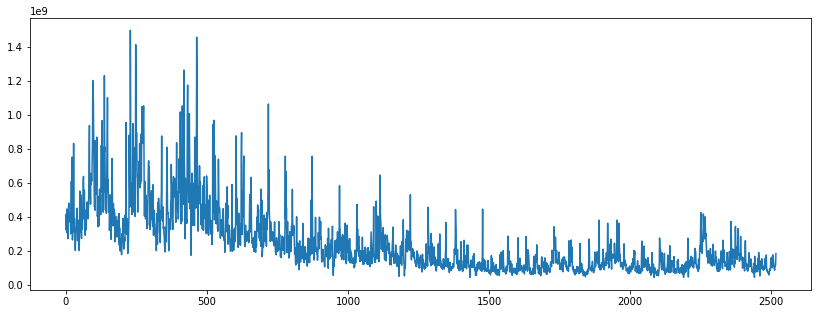

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_12 (Reshape)         (None, 10, 1)             0         
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 32)                1088      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
_________________________________________________________________
activation_12 (Activation)   (None, 1)                 0         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1811/1811 - 4s - loss: 0.0081 - val_loss: 0.0012
Epoch 2/3
1811/1811 - 3s - loss: 0.0067 - val_loss: 0.0029
Epoch 3/3
1811/1811 - 3s - loss: 0.0065 - val_loss: 0.0020
63/63 - 0s - loss: 0.0067
Train RMSE: 0.08 RMSE
63/63 - 0s - loss: 0.006

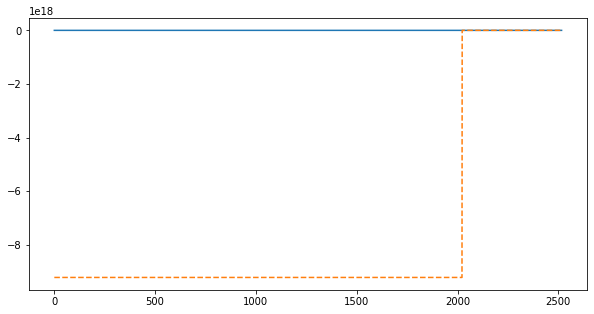

In [ ]:

df.plot("Date","Volume")
plt.show()

df = df.sort_index(ascending=False)
df.plot("Date","Volume")
plt.show()

df_1 = df.Volume.values.reshape(-1,1)
df_1

plt.figure(figsize=[14,5])
plt.plot(df_1)
plt.show()

train_rec = int(len(df_1)*0.8)
train_data = df_1[:train_rec]
test_data = df_1[train_rec:]
len(train_data), len(test_data)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)


def historical_data(td , histo):
  y = pd.DataFrame(td)
  datax = [y.shift(i) for i in range(1, histo+1)]
  datax = pd.concat(datax , axis=1)
  datax.fillna(0, inplace = True)
  return datax.values , y.values


histo = 10
trainx, trainy = historical_data(train_scaled , histo = histo)
testx, testy = historical_data(test_scaled , histo = histo)
trainx.shape, testx.shape

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN , Activation , Dropout , Dense,Reshape
model = Sequential()
model.add(Reshape((histo, 1) , input_shape=(histo, 1)))
model.add(SimpleRNN(32 , input_shape=(histo, 1)))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss="mean_squared_error", optimizer = "adam")
model.summary()

model.fit(trainx, trainy , epochs=3 , verbose=2 , batch_size=1 , validation_split=0.1)

import math
def get_model(model_obj):
  score_train=model_obj.evaluate(trainx , trainy , verbose=2)
  print("Train RMSE: %.2f RMSE" % (math.sqrt(score_train)))
  score_test=model_obj.evaluate(trainx , trainy , verbose=2)
  print("Test RMSE: %.2f RMSE" % (math.sqrt(score_test)))
get_model(model)
 

def plot_prediction(model_obj):
  test_predict=scaler.inverse_transform(model_obj.predict(testx))
  pred_test_plot = df_1.copy()
  pred_test_plot[:train_rec + histo,:]=np.nan 
  pred_test_plot[train_rec + histo:,:]=test_predict[histo:]
  plt.plot(df_1)
  plt.plot(pred_test_plot,"--")

%matplotlib inline 
plt.figure(figsize=[10,5])
plot_prediction(model) 

